<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import time
from sklearn.cluster import KMeans
from sklearn import metrics #Import scikit-learn metrics module 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statistics

In [2]:
# load dataset from github account
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/winequalityN.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#feature variables
x=df.drop(['quality'], axis=1)
#target variable
y=df.quality

************* k:  2
cluster:  0
pred quality:  5.808745111980093 0.8903434994590056
cluster:  1
pred quality:  5.826480263157895 0.8599746214202841
MAE:  0.6855387398794294
----
************* k:  3
cluster:  0
pred quality:  5.9831615120274915 0.8888319947636639
cluster:  1
pred quality:  5.683850931677019 0.8585764897219673
cluster:  2
pred quality:  5.684183410613086 0.8184107149237296
MAE:  0.666000770846656
----
************* k:  4
cluster:  0
pred quality:  5.5606884057971016 0.7770121288782624
cluster:  1
pred quality:  5.95306324110672 0.8977758555751825
cluster:  2
pred quality:  5.92 0.8656919154071012
cluster:  3
pred quality:  5.681148748159058 0.8562645339294926
MAE:  0.6636227434606367
----
************* k:  5
cluster:  0
pred quality:  5.549277266754271 0.7766341874910528
cluster:  1
pred quality:  5.874228395061729 0.8920494940971417
cluster:  2
pred quality:  5.702886247877759 0.8666433389457342
cluster:  3
pred quality:  5.792297111416781 0.8326087030163202
cluster:  4

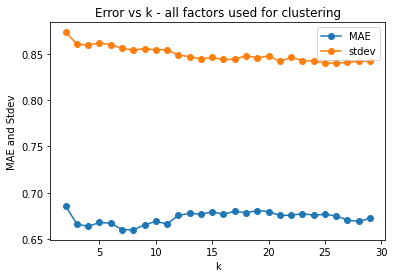

In [22]:
# k-means with all factors
meanabserror=[]
stderror=[]
clustercount=[]
timek1=[]
clusterquality1=[]
x=df.drop(['quality'], axis=1) #use all parameters

for k in range(2, 30):
   print('************* k: ', k, )   
   kmeans = KMeans(n_clusters=k, random_state=1, max_iter=5000) 
   tic = time.perf_counter()
   labels = kmeans.fit_predict(x)
   toc = time.perf_counter()
   timek1.append(toc-tic)

   # map cluster labels to wine quality (mean of quality per cluster is used)
   dfc = df.drop(['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates' ], axis=1)
   dfc['cluster']=labels
   dfc['predquality']=labels
   # assign quality value to each cluster
   for i in range(0, k):
      print('cluster: ', i)
      cluster = dfc.loc[dfc['cluster'] == i]
      #print(cluster.head(10))
      #print(cluster['quality'])
      pred_quality = cluster['quality'].mean()
      clusterquality1.append(pred_quality)
      qstd = cluster['quality'].std()
      print('pred quality: ',pred_quality, qstd)
      dfc['predquality'] = dfc['predquality'].replace(i,pred_quality)
   #print(dfc.head(55))

   #compute errors
   clustercount.append(k)
   meanabserror.append(mean_absolute_error(dfc['quality'], dfc['predquality']))
   temp=dfc['quality'] - dfc['predquality']
   stderror.append(temp.std())
   print('MAE: ', mean_absolute_error(dfc['quality'], dfc['predquality']))
   print('----')

#plot results vs tree depth
pyplot.plot(clustercount, meanabserror , '-o', label='MAE')
pyplot.plot(clustercount, stderror , '-o', label='stdev')
pyplot.title('Error vs k - all factors used for clustering')
pyplot.ylabel('MAE and Stdev')
pyplot.xlabel('k')
pyplot.legend()
pyplot.show()



    volatile acidity  alcohol
0               0.27      8.8
1               0.30      9.5
2               0.28     10.1
3               0.23      9.9
4               0.23      9.9
5               0.28     10.1
6               0.32      9.6
7               0.27      8.8
8               0.30      9.5
9               0.22     11.0
10              0.27     12.0
************* k:  2
cluster:  0
pred quality:  5.541215023947568 0.753042466280842
cluster:  1
pred quality:  6.260224538893344 0.8698069263652227
MAE:  0.659835831899728
----
************* k:  3
cluster:  0
pred quality:  6.499183006535947 0.8188295013334054
cluster:  1
pred quality:  5.464585431352803 0.7193510999779802
cluster:  2
pred quality:  5.9171833480956595 0.8428892244026139
MAE:  0.6243713068842599
----
************* k:  4
cluster:  0
pred quality:  6.08311345646438 0.8596290951209945
cluster:  1
pred quality:  5.431859205776173 0.7090866984061431
cluster:  2
pred quality:  6.535312180143296 0.8129533601402835
cluster:  

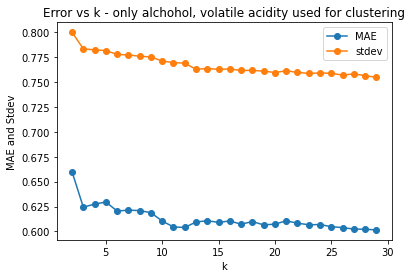

In [5]:
# k-means with only two parameters (alchohol, volatile acidity)
meanabserror=[]
stderror=[]
clustercount=[]
predq=[]
clust=[]
timek2=[]
x= df.drop(['quality', 'type', 'fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates'], axis=1)
print(x.head(11))

for k in range(2, 30):
   print('************* k: ', k, )   
   kmeans = KMeans(n_clusters=k, random_state=1, max_iter=5000) 
   tic = time.perf_counter()
   labels = kmeans.fit_predict(x)
   toc = time.perf_counter()
   timek2.append(toc-tic)

   # map cluster labels to wine quality (mode of quality per cluster is used)
   dfc = df.drop(['type', 'fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates' ], axis=1)
   dfc['cluster']=labels
   dfc['predquality']=labels
   # assign quality value to each cluster
   for i in range(0, k):
      print('cluster: ', i)
      cluster = dfc.loc[dfc['cluster'] == i]
      #print(cluster.head(10))
      #print(cluster['quality'])
      pred_quality = cluster['quality'].mean()
      predq.append(pred_quality)
      qstd = cluster['quality'].std()
      clust.append(i)
      print('pred quality: ',pred_quality, qstd)
      dfc['predquality'] = dfc['predquality'].replace(i,pred_quality)
   #print(dfc.head(55))

   #compute errors
   clustercount.append(k)
   meanabserror.append(mean_absolute_error(dfc['quality'], dfc['predquality']))
   temp=dfc['quality'] - dfc['predquality']
   stderror.append(temp.std())
   print('MAE: ', mean_absolute_error(dfc['quality'], dfc['predquality']))
   print('----')

#plot results vs tree depth
pyplot.plot(clustercount, meanabserror , '-o', label='MAE')
pyplot.plot(clustercount, stderror , '-o', label='stdev')
pyplot.title('Error vs k - only alchohol, volatile acidity used for clustering')
pyplot.ylabel('MAE and Stdev')
pyplot.xlabel('k')
pyplot.legend()
pyplot.show()



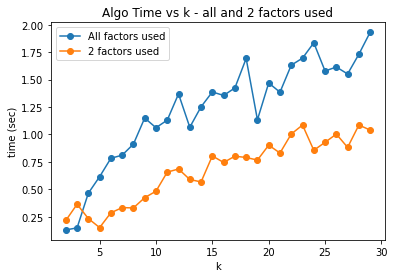

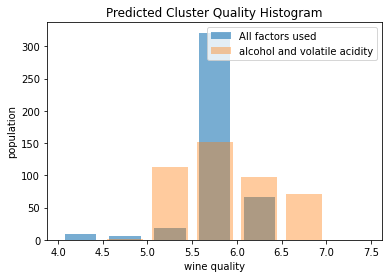

In [31]:
pyplot.plot(clustercount, timek1 , '-o', label='All factors used')
pyplot.plot(clustercount, timek2 , '-o', label='2 factors used')
pyplot.title('Algo Time vs k - all and 2 factors used')
pyplot.ylabel('time (sec)')
pyplot.xlabel('k')
pyplot.legend()
pyplot.show()

b=np.arange(4, 8, 0.5)
pyplot.hist(clusterquality1 , bins=b, alpha=0.6, rwidth=0.7, label='All factors used')
pyplot.hist(predq , bins=b, alpha=0.4, rwidth=0.8, label='alcohol and volatile acidity')
#pyplot.plot(clustercount, predq , '-o', label='2 factors used')
pyplot.title('Predicted Cluster Quality Histogram')
pyplot.ylabel('population')
pyplot.xlabel('wine quality')
pyplot.legend()
pyplot.show()

Text(0.5, 0, 'alcohol (%)')

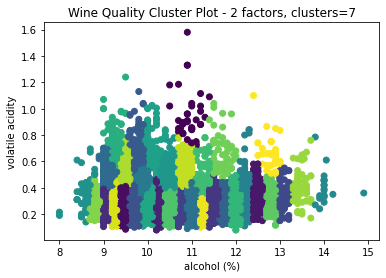

In [6]:
x= df.drop(['quality', 'type', 'fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates'], axis=1)
#print(x.head(7))
kmeans = KMeans(n_clusters=33, random_state=1, max_iter=5000) 
labels = kmeans.fit_predict(x)

pyplot.scatter(x['alcohol'], x['volatile acidity'], c=labels, label=labels)
pyplot.title('Wine Quality Cluster Plot - 2 factors, clusters=7')
pyplot.ylabel('volatile acidity')
pyplot.xlabel('alcohol (%)')
#pyplot.legend(labels)



Text(0.5, 0, 'cluster')

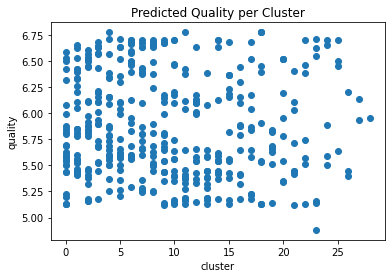

In [7]:
pyplot.scatter(clust, predq)
pyplot.title('Predicted Quality per Cluster')
pyplot.ylabel('quality')
pyplot.xlabel('cluster')